# Coffea and Awkward

**March 15, 2023 at Beijing**

In [1]:
import awkward as ak
import uproot
import hist
import os
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.nanoevents.methods.base import NanoEventsArray
from imp import reload #每次修改调用函数后可以更新
import correctionlib, rich
import matplotlib.pyplot as plt
import sys

/tmp/ipykernel_5519/1593424902.py:8: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload #每次修改调用函数后可以更新


In [2]:
import met_file 
reload(met_file)
dataC_events = met_file.met_file('dataF')
dataD_events = met_file.met_file('dataG')
zg_events = met_file.met_file('zg')
ttbar_events = met_file.met_file('tt')
zz_events = met_file.met_file('zz')
wz_events = met_file.met_file('wz')
ww_events = met_file.met_file('ww')
#10m

dataF  is done!
dataG  is done!
zg  is done!
tt  is done!
zz  is done!
wz  is done!
ww  is done!


In [3]:
EVENT = {
    'dataF':dataC_events,
    'dataG':dataD_events,
    'zg':zg_events,
    'tt': ttbar_events,
    'zz': zz_events,
    'wz': wz_events,
    'ww': ww_events,
}

## Trigger efficiency

In [4]:
import pileup_cut
reload(pileup_cut)
event_met = {key: {} for key in EVENT}
event_mu_met = {key: {} for key in EVENT}


for key in EVENT.keys():
    event_variable1 = []
    event_variable2 = []
    for i in EVENT[key]:
#muon_cut
        if 'data' not in key:
            event_weight = {'event_weight':np.sign(i.Generator.weight)}
            mu0 = pileup_cut.muon(i,'num',True)
        elif key == 'dataF':
            murun = pileup_cut.muon(i,'run_num','F')
            event_weight =  {'event_weight':'NONE'}
            mu0 = pileup_cut.muon(murun,'num',True)
        elif key == 'dataG':
            murun = pileup_cut.muon(i,'run_num','G')
            event_weight =  {'event_weight':'NONE'}
            mu0 = pileup_cut.muon(murun,'num',True)           
        mu1 = pileup_cut.muon(mu0,'trigger','met')
        mu2,event2 = pileup_cut.muon(mu1,'cutBasedID','tight')
        mu3 = pileup_cut.muon(mu2,'pf','tight')
        mu4 = pileup_cut.muon(mu3,'eta','2.4')
        mu5 = pileup_cut.muon(mu4,'pt',event2)
        mu6 = pileup_cut.muon(mu5,'pid',True)
        mass = pileup_cut.MASS(mu6,'mu')
        mu_mass = pileup_cut.muon(mu6,'mass',mass)
        #
        lg_near, lg_dr = mu_mass.Photon.nearest(mu_mass.Muon, axis=1, return_metric=True)
        fsr = pileup_cut.muon(mu_mass,'fsr',lg_dr)
        event_variable1.append(pileup_cut.VARIABLES(fsr,True,key,event_weight))
        # mass_mumu = pileup_cut.MASS(mu_mass,'mu')
        # mass_gmumu = pileup_cut.MASS(mu_mass,'gmumu')
        # mass_fsr = mass_mumu + mass_gmumu
        # fsr = pileup_cut.muon(mu_mass,'fsr',mass_fsr)
        # mass_mumu = pileup_cut.MASS(fsr,'mu')
        # event_variable1.append(pileup_cut.VARIABLES(fsr,mass_mumu,key,event_weight))
        mu_trigger = pileup_cut.muon(fsr,'trigger','double')
        event_variable2.append(pileup_cut.VARIABLES(mu_trigger,True,key,event_weight))
        # mass = pileup_cut.MASS(mu_trigger,'mu')
        # event_variable2.append(pileup_cut.VARIABLES(mu_trigger,mass,key,event_weight))
    event_met[key] = event_variable1
    event_mu_met[key] = event_variable2
    print(key,'event_met',event_met[key][0])
    print(key,'event_mu_met',event_mu_met[key][0])



#data 30m  
#mc 30m


dataF event_met {'muon1_pt': <Array [97.5, 216, 143, ... 91.6, 76.3, 136] type='20 * ?float32[parameters={"__...'>, 'muon1_eta': <Array [1.76, -0.664, 0.147, ... 0.967, -1.75] type='20 * ?float32[parameters={"...'>}
dataF event_mu_met {'muon1_pt': <Array [216, 143, 139, ... 91.6, 76.3, 136] type='18 * ?float32[parameters={"__d...'>, 'muon1_eta': <Array [-0.664, 0.147, -1.2, ... 0.967, -1.75] type='18 * ?float32[parameters={"...'>}
dataG event_met {'muon1_pt': <Array [150, 104, 107, ... 98.7, 144, 102] type='20 * ?float32[parameters={"__do...'>, 'muon1_eta': <Array [-1.08, 0.155, -1.62, ... -2.36, -0.792] type='20 * ?float32[parameters={...'>}
dataG event_mu_met {'muon1_pt': <Array [150, 104, 107, ... 98.7, 144, 102] type='19 * ?float32[parameters={"__do...'>, 'muon1_eta': <Array [-1.08, 0.155, -1.62, ... -2.36, -0.792] type='19 * ?float32[parameters={...'>}


/home/pku/muty/anaconda3/lib/python3.8/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


zg event_met {'muon1_pt': <Array [210, 87.6, 124, ... 122, 99.6, 158] type='43 * ?float32[parameters={"__d...'>, 'muon1_eta': <Array [0.888, 1.07, 0.915, ... 1.04, -0.83] type='43 * ?float32[parameters={"__...'>}
zg event_mu_met {'muon1_pt': <Array [210, 87.6, 124, ... 122, 99.6, 158] type='41 * ?float32[parameters={"__d...'>, 'muon1_eta': <Array [0.888, 1.07, 0.915, ... 1.04, -0.83] type='41 * ?float32[parameters={"__...'>}
tt event_met {'muon1_pt': <Array [77.5, 65.4, 74.2, ... 55.9, 90.6, 88.7] type='384 * ?float32[parameters=...'>, 'muon1_eta': <Array [0.463, -1.23, ... -0.264, 0.794] type='384 * ?float32[parameters={"__doc...'>}
tt event_mu_met {'muon1_pt': <Array [77.5, 65.4, 49, ... 53.7, 90.6, 88.7] type='357 * ?float32[parameters={"...'>, 'muon1_eta': <Array [0.463, -1.23, ... -0.264, 0.794] type='357 * ?float32[parameters={"__doc...'>}
zz event_met {'muon1_pt': <Array [158, 96.5, 89.2, ... 141, 168, 139] type='140 * ?float32[parameters={"__...'>, 'muon1_eta': <Array [1.2, -0.

In [5]:
# 样本名称列表
sample_names = ["dataF","dataG","zg","tt", "zz", "ww", "wz"]
# sample_names = ["tt", "zz", "ww", "wz"]
# 初始化一个字典，用于存储合并后的数据
met_final = {}
mu_met_final = {}

# 遍历每个样本名称
for sample_name in sample_names:
    print(sample_name)
    # 初始化一个字典，用于存储当前样本的合并数据
    met_final[sample_name] = {}
    mu_met_final[sample_name] = {}

    # 获取第一个条目中的信息键
    info_keys = list(event_met[sample_name][0].keys())

    # 遍历每个信息键
    for info_key in info_keys:
        # 从 event_muon_phodrs 中提取当前样本和信息键的数据
        data_to_concatenate1 = [entry[info_key] for entry in event_met[sample_name]]
        data_to_concatenate2 = [entry[info_key] for entry in event_mu_met[sample_name]]

        # 使用 ak.concatenate 将数据连接在一起
        met_final[sample_name][info_key] = ak.concatenate(data_to_concatenate1)
        mu_met_final[sample_name][info_key] = ak.concatenate(data_to_concatenate2)


#print(event_final)


dataF
dataG
zg
tt
zz
ww
wz


In [6]:
def save_event_dict(event_dict, file_prefix):
    # data_subkeys = ['photon_pt', 'photon_eta', 'muon1_pt', 'muon2_pt', 'muon1_eta', 'muon2_eta', 'muon_mass','gmumu_mass','photon_endcap','photon_barrel','npvsGood','Rho_Calo','Rho_tracker']#,'npvsGood','Rho_Calo','Rho_tracker',,'dr_lg','charge1','charge2'
    data_subkeys = ['muon1_pt','muon1_eta']
    other_subkeys = data_subkeys 
    # other_subkeys = data_subkeys

    for key, value in event_dict.items():
        subkeys = other_subkeys if 'data' not in key else data_subkeys
        for subkey in subkeys:
            ak.to_parquet(value[subkey], f'{file_prefix}_{key}_{subkey}.parquet')



In [7]:
# 存储数据
save_event_dict(met_final, 'selection_file/met_final')
save_event_dict(mu_met_final, 'selection_file/mu_met_final')

## imput sample

In [14]:
def load_event_dict(file_prefix, keys):
    data_subkeys = ['muon1_pt','muon1_eta']
    other_subkeys = data_subkeys 
    
    event_dict = {}
    for key in keys:
        subkeys = other_subkeys if 'data' not in key else data_subkeys
        event_dict[key] = {}
        for subkey in subkeys:
            event_dict[key][subkey] = ak.from_parquet(f'{file_prefix}_{key}_{subkey}.parquet')
    return event_dict

In [15]:
keys = ['dataF', 'dataG', 'zg','tt', 'zz', 'ww', 'wz']  # 根据你的实际键来修改这个列表
# 读取数据
met_final = load_event_dict('selection_file/met_final', keys)
mu_met_final = load_event_dict('selection_file/mu_met_final', keys)

In [16]:
mu_met_final

{'dataF': {'muon1_pt': <Array [216, 143, 139, 112, ... 105, 141, 94.6] type='2829 * ?float32'>,
  'muon1_eta': <Array [-0.664, 0.147, ... -0.714, -0.905] type='2829 * ?float32'>},
 'dataG': {'muon1_pt': <Array [150, 104, 107, ... 47.1, 89.4, 140] type='1960 * ?float32'>,
  'muon1_eta': <Array [-1.08, 0.155, -1.62, ... -0.697, 0.57] type='1960 * ?float32'>},
 'zg': {'muon1_pt': <Array [210, 87.6, 124, 199, ... 115, 192, 153] type='247745 * ?float32'>,
  'muon1_eta': <Array [0.888, 1.07, 0.915, ... -0.935, -2.18] type='247745 * ?float32'>},
 'tt': {'muon1_pt': <Array [77.5, 65.4, 49, ... 86.9, 53, 76.9] type='28898 * ?float32'>,
  'muon1_eta': <Array [0.463, -1.23, -0.679, ... -1.52, -1.82] type='28898 * ?float32'>},
 'zz': {'muon1_pt': <Array [158, 96.5, 89.2, ... 76.3, 76.1, 114] type='1490 * ?float32'>,
  'muon1_eta': <Array [1.2, -0.0392, -0.0687, ... 2.12, 0.173] type='1490 * ?float32'>},
 'ww': {'muon1_pt': <Array [75.6, 108, 63.7, ... 32, 34.4, 33.7] type='523 * ?float32'>,
  'muo

In [17]:
# 将 "data1", "data2", "data3", "data4" 这四个 key 的内容合并为 "data" 这个 key
mc_keys = ["zg","tt", "zz", "ww", "wz"]
met_final["mc"] = {}
mu_met_final["mc"] = {}

info_keys = list(met_final["zg"].keys())

# 遍历每个信息键
for info_key in info_keys:
    # 从 event_final 中提取 "data1", "data2", "data3", "data4" 这四个 key 的数据
    data_to_concatenate1 = [met_final[mc_key][info_key] for mc_key in mc_keys]
    data_to_concatenate2 = [mu_met_final[mc_key][info_key] for mc_key in mc_keys]

    # 使用 ak.concatenate 将数据连接在一起
    met_final["mc"][info_key] = ak.concatenate(data_to_concatenate1)
    mu_met_final["mc"][info_key] = ak.concatenate(data_to_concatenate2)


In [18]:
# 将 "data1", "data2", "data3", "data4" 这四个 key 的内容合并为 "data" 这个 key
mc_keys = ["dataF","dataG"]
met_final["data"] = {}
mu_met_final["data"] = {}

info_keys = list(met_final["dataF"].keys())

# 遍历每个信息键
for info_key in info_keys:
    # 从 event_final 中提取 "data1", "data2", "data3", "data4" 这四个 key 的数据
    data_to_concatenate1 = [met_final[mc_key][info_key] for mc_key in mc_keys]
    data_to_concatenate2 = [mu_met_final[mc_key][info_key] for mc_key in mc_keys]

    # 使用 ak.concatenate 将数据连接在一起
    met_final["data"][info_key] = ak.concatenate(data_to_concatenate1)
    mu_met_final["data"][info_key] = ak.concatenate(data_to_concatenate2)


In [19]:
del met_final["zg"]
del met_final["tt"]
del met_final["zz"]
del met_final["ww"]
del met_final["wz"]
del met_final["dataF"]
del met_final["dataG"]
met_final

{'mc': {'muon1_pt': <Array [210, 87.6, 124, 199, ... 413, 150, 176] type='299957 * ?float32'>,
  'muon1_eta': <Array [0.888, 1.07, 0.915, ... -1.1, -0.39] type='299957 * ?float32'>},
 'data': {'muon1_pt': <Array [97.5, 216, 143, ... 47.1, 89.4, 140] type='5333 * ?float32'>,
  'muon1_eta': <Array [1.76, -0.664, 0.147, ... -0.697, 0.57] type='5333 * ?float32'>}}

In [20]:
del mu_met_final["zg"]
del mu_met_final["tt"]
del mu_met_final["zz"]
del mu_met_final["ww"]
del mu_met_final["wz"]
del mu_met_final["dataF"]
del mu_met_final["dataG"]
mu_met_final

{'mc': {'muon1_pt': <Array [210, 87.6, 124, 199, ... 413, 150, 176] type='285442 * ?float32'>,
  'muon1_eta': <Array [0.888, 1.07, 0.915, ... -1.1, -0.39] type='285442 * ?float32'>},
 'data': {'muon1_pt': <Array [216, 143, 139, ... 47.1, 89.4, 140] type='4789 * ?float32'>,
  'muon1_eta': <Array [-0.664, 0.147, -1.2, ... -0.697, 0.57] type='4789 * ?float32'>}}

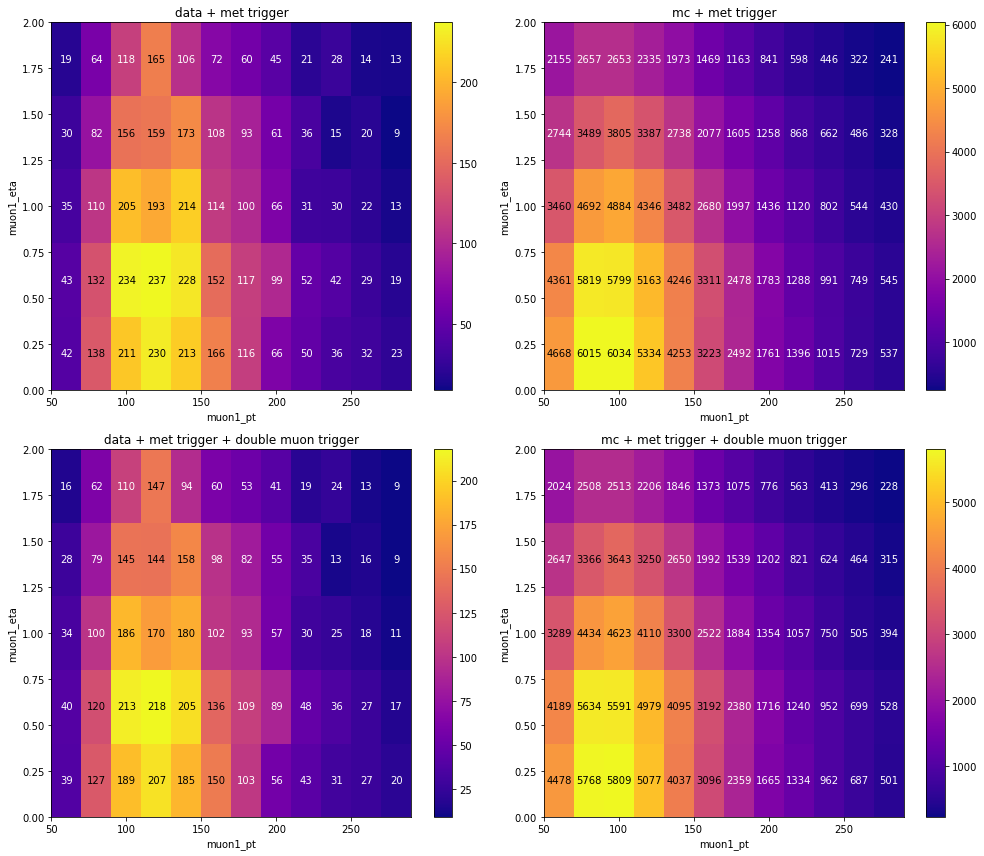

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Set bins
bins_pt = np.arange(50,300,20)
bins_eta = np.arange(0,2.4,0.4)

# Set bin centers
bin_centers_pt = (bins_pt[:-1] + bins_pt[1:]) / 2
bin_centers_eta = (bins_eta[:-1] + bins_eta[1:]) / 2

data_keys = ['data', 'mc']

for i, key in enumerate(data_keys):
    muon1_pt_met = np.array(met_final[key]['muon1_pt'])
    muon1_eta_met = np.array(abs(met_final[key]['muon1_eta']))
    
    muon1_pt_mu_met = np.array(mu_met_final[key]['muon1_pt'])
    muon1_eta_mu_met = np.array(abs(mu_met_final[key]['muon1_eta']))
    
    # Calculate histograms
    hist_met = np.histogram2d(muon1_pt_met, muon1_eta_met, bins=[bins_pt, bins_eta])[0]
    hist_mu_met = np.histogram2d(muon1_pt_mu_met, muon1_eta_mu_met, bins=[bins_pt, bins_eta])[0]
    
    im_met = axs[0, i].imshow(hist_met.T, origin='lower', cmap='plasma', extent=[bins_pt[0], bins_pt[-1], bins_eta[0], bins_eta[-1]], aspect='auto')
    im_mu_met = axs[1, i].imshow(hist_mu_met.T, origin='lower', cmap='plasma', extent=[bins_pt[0], bins_pt[-1], bins_eta[0], bins_eta[-1]], aspect='auto')
    
    axs[0, i].set_xlabel('muon1_pt')
    axs[0, i].set_ylabel('muon1_eta')
    axs[0, i].set_title(f'{key} + met trigger')
    axs[1, i].set_xlabel('muon1_pt')
    axs[1, i].set_ylabel('muon1_eta')
    axs[1, i].set_title(f'{key} + met trigger + double muon trigger')
    
    # Add colorbars
    fig.colorbar(im_met, ax=axs[0, i])
    fig.colorbar(im_mu_met, ax=axs[1, i])
    
    # Add labels to bins
    for (j, k), label in np.ndenumerate(hist_met):
        axs[0, i].text(bin_centers_pt[j], bin_centers_eta[k], int(label), ha='center', va='center', color='black' if im_met.norm(label) > 0.5 else 'white')
    for (j, k), label in np.ndenumerate(hist_mu_met):
        axs[1, i].text(bin_centers_pt[j], bin_centers_eta[k], int(label), ha='center', va='center', color='black' if im_mu_met.norm(label) > 0.5 else 'white')
    
plt.tight_layout()
plt.show()


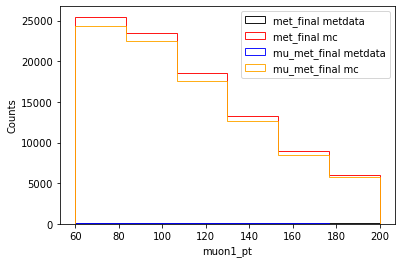

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# create pt bins
num_bins = 7
pt_bins = np.linspace(60, 200, num_bins)

plt.hist(met_final['metdata']['muon1_pt'], bins=pt_bins, alpha=0.9, color='black', label='met_final metdata',histtype="step")
plt.hist(met_final['mc']['muon1_pt'], bins=pt_bins, alpha=0.9, color='red', label='met_final mc',histtype="step")
plt.hist(mu_met_final['metdata']['muon1_pt'], bins=pt_bins, alpha=0.9, color='blue', label='mu_met_final metdata',histtype="step")
plt.hist(mu_met_final['mc']['muon1_pt'], bins=pt_bins, alpha=0.9, color='orange', label='mu_met_final mc',histtype="step")

plt.legend(loc='upper right')
plt.xlabel('muon1_pt')
plt.ylabel('Counts')
plt.show()


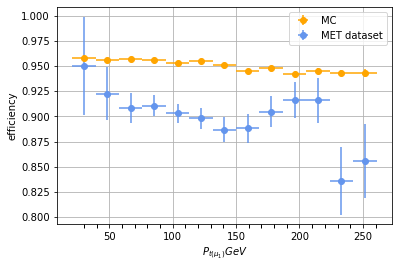

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def calculate_efficiency(data, met_final, bins):
    hist_data, _ = np.histogram(data, bins=bins)
    hist_met_final, _ = np.histogram(met_final, bins=bins)
    efficiency = hist_met_final / hist_data
    return efficiency

def calculate_error(data, met_final, bins):
    hist_data, _ = np.histogram(data, bins=bins)
    hist_met_final, _ = np.histogram(met_final, bins=bins)
    error = np.sqrt(hist_met_final*(1-hist_met_final/hist_data))/hist_data
    return error

bins = np.linspace(30, 270, 14)  # Change the number of bins if necessary

efficiency_metdata = calculate_efficiency(met_final['data']['muon1_pt'], mu_met_final['data']['muon1_pt'], bins)
efficiency_mc = calculate_efficiency(met_final['mc']['muon1_pt'], mu_met_final['mc']['muon1_pt'], bins)

error_metdata = calculate_error(met_final['data']['muon1_pt'], mu_met_final['data']['muon1_pt'], bins)
error_mc = calculate_error(met_final['mc']['muon1_pt'], mu_met_final['mc']['muon1_pt'], bins)

x = bins[:-1]  # x coordinates of the bins
xerr = np.diff(bins) / 2  # half the bin width

fig, ax = plt.subplots()
# Add minor ticks without labels
ax.set_xticks(np.arange(30, 270, 10), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.05), minor=True)
ax.tick_params(axis='both', which='minor', length=4, width=1, labelsize=0)

# First plot MC, then plot MET dataset
ax.errorbar(x, efficiency_mc, xerr=xerr, yerr=error_mc, fmt='o', color='orange',  label='MC')
ax.errorbar(x, efficiency_metdata, xerr=xerr, yerr=error_metdata, fmt='o', color='cornflowerblue', label='MET dataset')

ax.set_xlabel('$P_{t (\mu_1)} GeV$')
ax.set_ylabel('efficiency')
ax.legend()
ax.grid(True)

plt.show()

# Calculate SF and save it as a 2D array
SF = efficiency_metdata / efficiency_mc
SF_2D = np.column_stack((x, SF))

#np.savetxt('SF.txt', SF_2D)  # Save SF to a text file


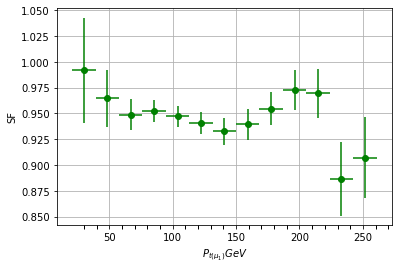

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

def calculate_efficiency(data, met_final, bins):
    hist_data, _ = np.histogram(data, bins=bins)
    hist_met_final, _ = np.histogram(met_final, bins=bins)
    efficiency = hist_met_final / hist_data
    return efficiency

def calculate_error(data, met_final, bins):
    hist_data, _ = np.histogram(data, bins=bins)
    hist_met_final, _ = np.histogram(met_final, bins=bins)
    error = np.sqrt(hist_met_final*(1-hist_met_final/hist_data))/hist_data
    return error

bins = np.linspace(30, 270, 14)  # Change the number of bins if necessary

efficiency_metdata = calculate_efficiency(met_final['data']['muon1_pt'], mu_met_final['data']['muon1_pt'], bins)
efficiency_mc = calculate_efficiency(met_final['mc']['muon1_pt'], mu_met_final['mc']['muon1_pt'], bins)

error_metdata = calculate_error(met_final['data']['muon1_pt'], mu_met_final['data']['muon1_pt'], bins)
error_mc = calculate_error(met_final['mc']['muon1_pt'], mu_met_final['mc']['muon1_pt'], bins)

x = bins[:-1]  # x coordinates of the bins
xerr = np.diff(bins) / 2  # half the bin width

SF = efficiency_metdata / efficiency_mc
SF_error = SF * np.sqrt((error_metdata / efficiency_metdata)**2 + (error_mc / efficiency_mc)**2)

SF_2D = np.column_stack((x, SF, SF_error))

fig, ax = plt.subplots()
# Add minor ticks without labels
ax.set_xticks(np.arange(30, 310, 10), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.05), minor=True)
ax.tick_params(axis='both', which='minor', length=4, width=1, labelsize=0)

# Plot SF_2D
ax.errorbar(SF_2D[:, 0], SF_2D[:, 1], xerr=xerr, yerr=SF_2D[:, 2], fmt='o', color='green')

ax.set_xlabel('$P_{t (\mu_1)} GeV$')
ax.set_ylabel('SF')
ax.grid(True)

plt.show()


In [31]:
SF_2D

array([[3.00000000e+01, 9.91839378e-01, 5.09682502e-02],
       [4.84615385e+01, 9.64846215e-01, 2.76343671e-02],
       [6.69230769e+01, 9.48994504e-01, 1.54559530e-02],
       [8.53846154e+01, 9.52363231e-01, 1.10242545e-02],
       [1.03846154e+02, 9.47176894e-01, 1.03649392e-02],
       [1.22307692e+02, 9.40863486e-01, 1.09711319e-02],
       [1.40769231e+02, 9.32824432e-01, 1.29997259e-02],
       [1.59230769e+02, 9.39524226e-01, 1.52510700e-02],
       [1.77692308e+02, 9.54437999e-01, 1.60371282e-02],
       [1.96153846e+02, 9.72696587e-01, 1.92487797e-02],
       [2.14615385e+02, 9.69485565e-01, 2.37184520e-02],
       [2.33076923e+02, 8.86626061e-01, 3.56691567e-02],
       [2.51538462e+02, 9.07257547e-01, 3.94513602e-02]])

In [32]:
# convert the numpy array to pandas DataFrame
df = pd.DataFrame(SF_2D, columns=["x", "SF", "SF_error"])

# save the DataFrame to a parquet file
df.to_parquet("trigger_file/SF_2D.parquet")

In [17]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import awkward as ak
import os

In [18]:
# Convert your dictionary data to pandas dataframe
df = pd.DataFrame.from_dict({
    key: pd.Series(ak.to_list(value))
    for key, value in data_mc_ratios.items()
})

NameError: name 'data_mc_ratios' is not defined

In [ ]:
# Save dataframe to parquet
file_path = os.path.join("pileup_file", "data.parquet")
table = pa.Table.from_pandas(df)
pq.write_table(table, file_path)